#### 1. Import libraries and load dataset.

In [1]:
import numpy as np
from numpy import *
import pandas as pd
from scipy.io import loadmat
from os import listdir
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report

In [2]:
def load_data(path):
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('train_32x32.mat')
X_test, y_test = load_data('test_32x32.mat')

# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Training Set:  (73257, 32, 32, 3) (73257,)
Test Set:  (26032, 32, 32, 3) (26032,)


#### 2. Clean the data

//anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


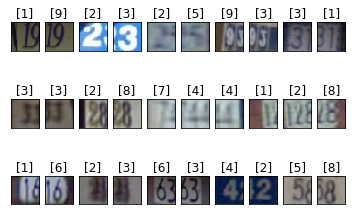

In [3]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])
        
# Plot some training images
plot_images(X_train, y_train, 3, 10)

In [3]:
# change number 10 to 0
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0
imgtesttarget=np.unique(y_train)
print(imgtesttarget)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
# Covert RGB to greyscale
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

X_train = rgb2gray(X_train).astype(np.float32)
X_test = rgb2gray(X_test).astype(np.float32)

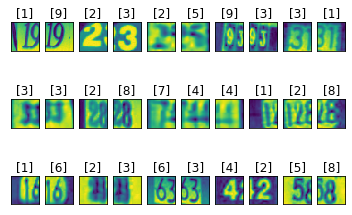

In [6]:
#plot greyscale images
plot_images(X_train, y_train, 3, 10)

In [5]:
#Normalization
# Calculate the mean on the training data
train_mean = np.mean(X_train, axis=0)

# Calculate the std on the training data
train_std = np.std(X_train, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (X_train - train_mean) / train_std
test_greyscale_norm = (X_test - train_mean)  / train_std

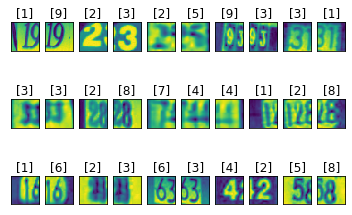

In [8]:
#plot images after normalization
plot_images(X_train, y_train, 3, 10)

In [66]:
'''
# Transpose the image arrays
X_train, y_train = X_train.transpose((0,2,3,1)), y_train[:]
X_test, y_test = X_test.transpose((0,2,3,1)), y_test[:]

print("Training Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)
'''

Training Set:  (73257, 32, 1, 32) (73257, 1)
Test Set:  (26032, 32, 1, 32) (26032, 1)


In [6]:
# change the Dimensions of data
X_train_arr = array(X_train)
X_train_reshape=X_train_arr.reshape(73257,-1)

X_test_arr = array(X_test)
X_test_reshape=X_test_arr.reshape(26032,-1)

print(X_train_reshape.shape)
print(X_test_reshape.shape)

(73257, 1024)
(26032, 1024)


#### 3. Train the model

In [7]:
#try the model

X_train_reshape=X_train_reshape[:20000]
X_test_reshape=X_test_reshape[:20000]
y_train_reshape=y_train[:20000]
y_test_reshape=y_test[:20000]

In [8]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_reshape,y_train_reshape)
predict = mnb.predict(X_test_reshape)
print("accuracy_score: %.4lf" % accuracy_score(predict,y_test_reshape))
print("Classification report for classifier %s:\n%s\n" % (mnb, classification_report(y_test_reshape, predict)))

accuracy_score: 0.1595
Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       0.14      0.15      0.14      1368
           1       0.29      0.16      0.20      3900
           2       0.12      0.09      0.10      3216
           3       0.15      0.12      0.13      2223
           4       0.28      0.24      0.26      1960
           5       0.20      0.20      0.20      1797
           6       0.12      0.21      0.15      1526
           7       0.12      0.15      0.13      1516
           8       0.06      0.03      0.04      1269
           9       0.12      0.30      0.17      1225

    accuracy                           0.16     20000
   macro avg       0.16      0.17      0.15     20000
weighted avg       0.18      0.16      0.16     20000




In [9]:
from sklearn.svm import SVC

svc = SVC(C=2,kernel='rbf',gamma='scale')
svc.fit(X_train_reshape,y_train_reshape)
predict = svc.predict(X_test_reshape)
print("accuracy_score: %.4lf" % accuracy_score(predict,y_test_reshape))
print("Classification report for classifier %s:\n%s\n" % (svc, classification_report(y_test_reshape, predict)))

accuracy_score: 0.6401
Classification report for classifier SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      1368
           1       0.56      0.90      0.69      3900
           2       0.66      0.73      0.69      3216
           3       0.66      0.50      0.57      2223
           4       0.71      0.70      0.70      1960
           5       0.71      0.51      0.60      1797
           6       0.67      0.51      0.58      1526
           7       0.77      0.53      0.63      1516
           8       0.69      0.42      0.52      1269
           9       0.62      0.53      0.57      1225

    accuracy                           0.64     20000
   macro avg       0.67      0.59      0.62     20000
weigh

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=10)
knc.fit(X_train_reshape,y_train_reshape)
predict = knc.predict(X_test_reshape)
print("accuracy_score: %.4lf" % accuracy_score(predict,y_test_reshape))
print("Classification report for classifier %s:\n%s\n" % (knc, classification_report(y_test_reshape, predict)))

accuracy_score: 0.4545
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.36      0.50      0.42      1368
           1       0.44      0.84      0.58      3900
           2       0.53      0.50      0.51      3216
           3       0.42      0.31      0.36      2223
           4       0.53      0.56      0.54      1960
           5       0.48      0.24      0.32      1797
           6       0.43      0.24      0.31      1526
           7       0.62      0.27      0.38      1516
           8       0.35      0.17      0.23      1269
           9       0.39      0.24      0.30      1225

    accuracy                           0.45     20000
   macro avg       0.45      0.39      0.39     20000
weighted avg       0.46      0.45      0.43    